Clustering - global development

Importing Libraries

Commonly used libraries for clustering and data manipulation are imported, such as:
pandas for data handling.
numpy for numerical operations.
Visualization libraries like matplotlib or seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')


Loading the Dataset

A dataset containing global development indicators (e.g., GDP, life expectancy, literacy rates) is loaded. This may use pandas.read_xlxs() or similar functions.

In [2]:
WD = pd.read_excel("E:\DS PROJECT\World_development_mesurement (1).xlsx")
WD

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


Data Preprocessing

Handling missing values: Techniques like imputation or dropping null values.
Normalizing or scaling the data to ensure variables are on a comparable scale (e.g., using StandardScaler or MinMaxScaler).
Checking for outliers and cleaning the data.

In [3]:
WD.rename(columns={'GDP#':'GDP', 'Country?':'Country'}, inplace=True)
WD.set_index('GDP',inplace=True)
WD

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
GDP,,,,,,,,,,,,,,,,,,,,,
"$54,790,058,957",0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,0.035,$60,NaN,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
"$9,129,594,819",0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,0.034,$22,NaN,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
"$2,359,122,303",0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,0.043,$15,NaN,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
"$5,788,311,645",0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,0.047,$152,NaN,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
"$2,610,959,139",0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,0.051,$12,NaN,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
"$16,244,600,000,000",0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,0.179,"$8,895",175.0,...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
"$50,004,354,667",0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,0.089,"$1,308",310.0,...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"


Exploratory Data Analysis (EDA)

Visualization of relationships, distributions, and key statistics.
Correlation analysis and feature selection based on relevance to clustering.

In [4]:
WD.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [5]:
WD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2704 entries, $54,790,058,957 to nan
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       2395 non-null   object 
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non

In [6]:
WD.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

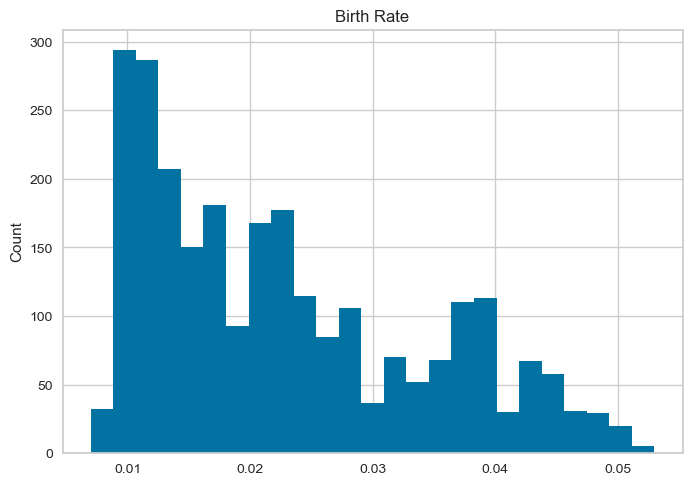

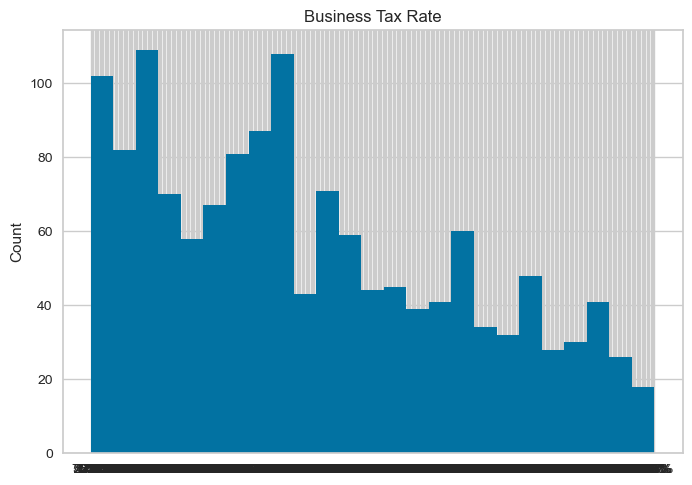

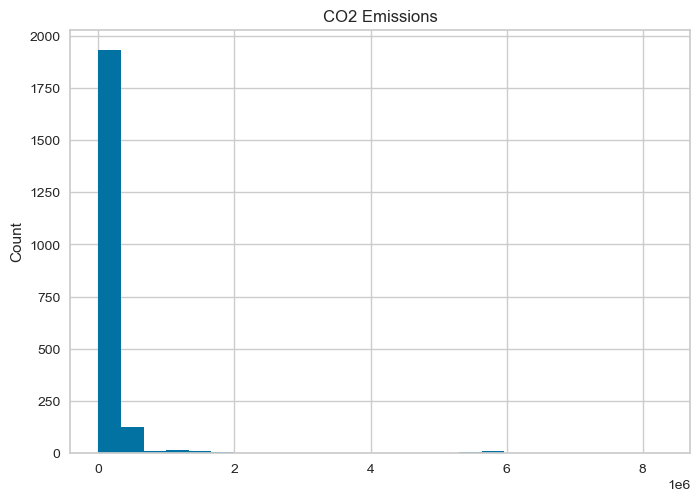

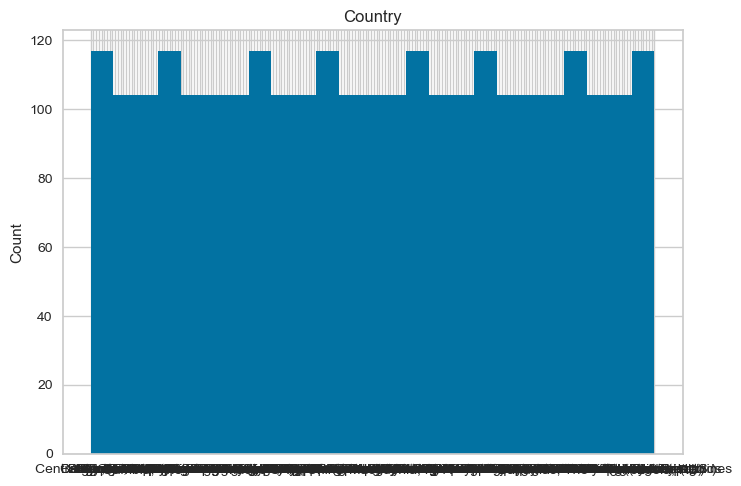

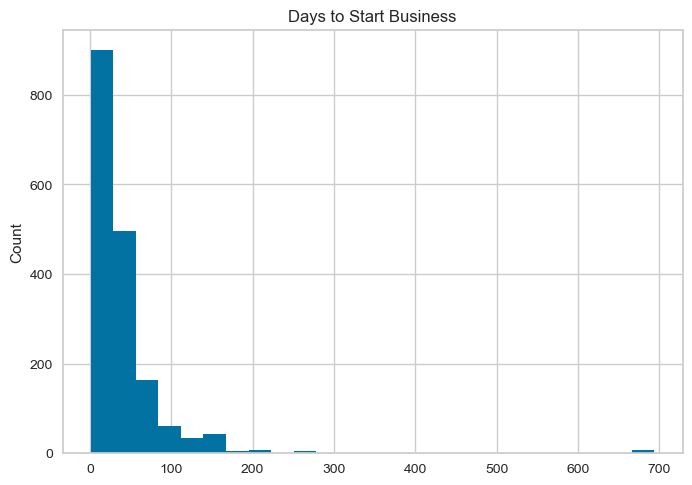

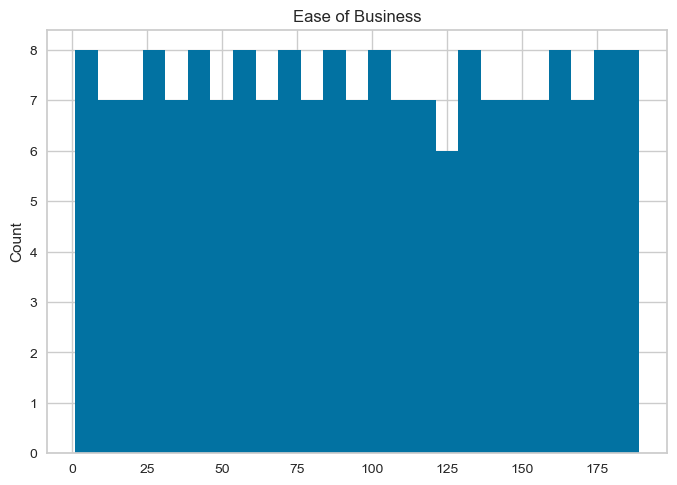

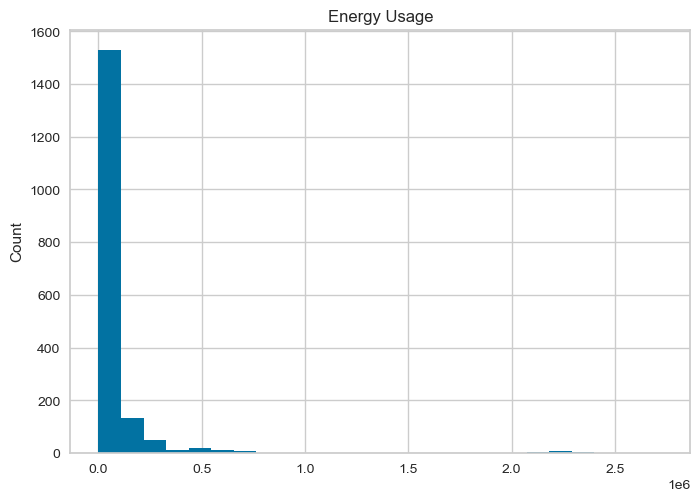

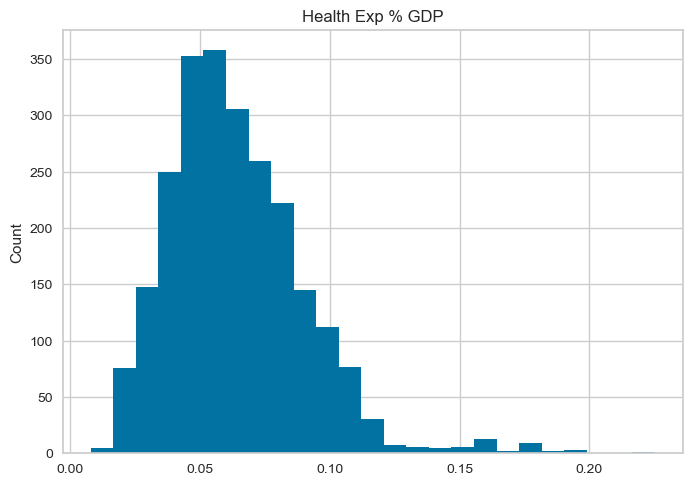

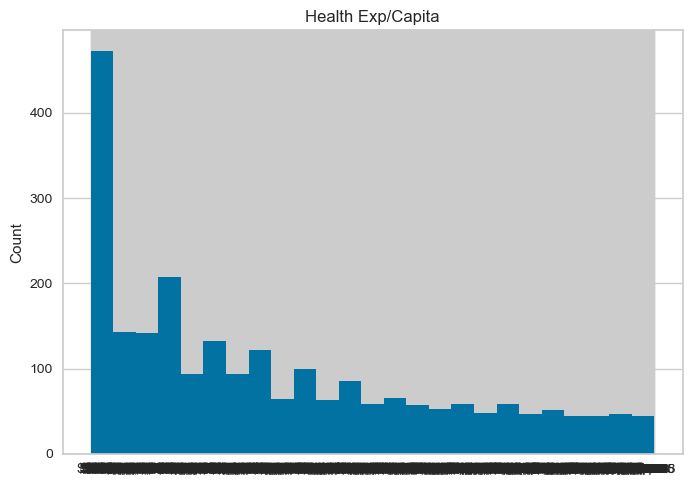

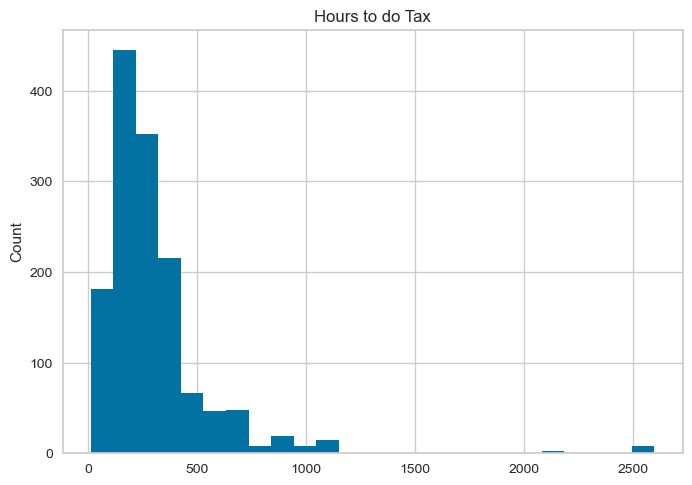

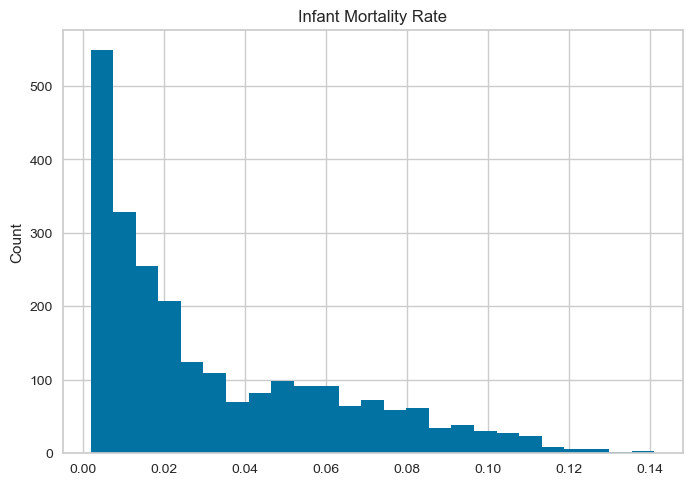

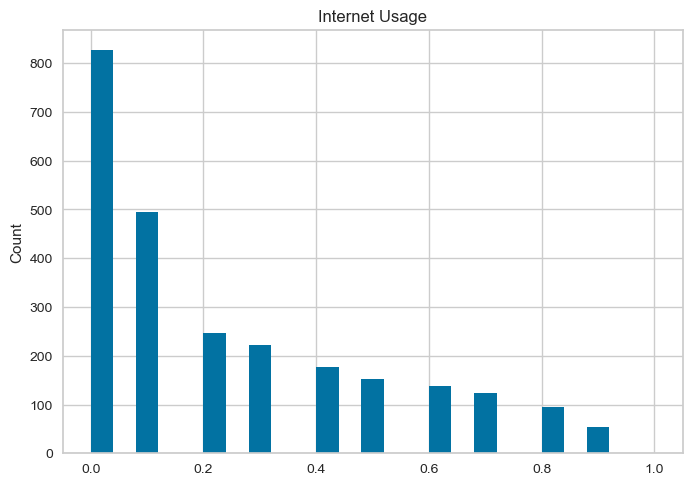

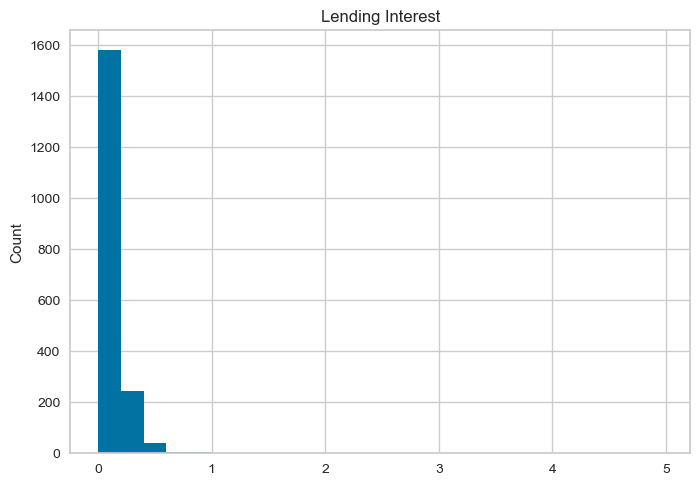

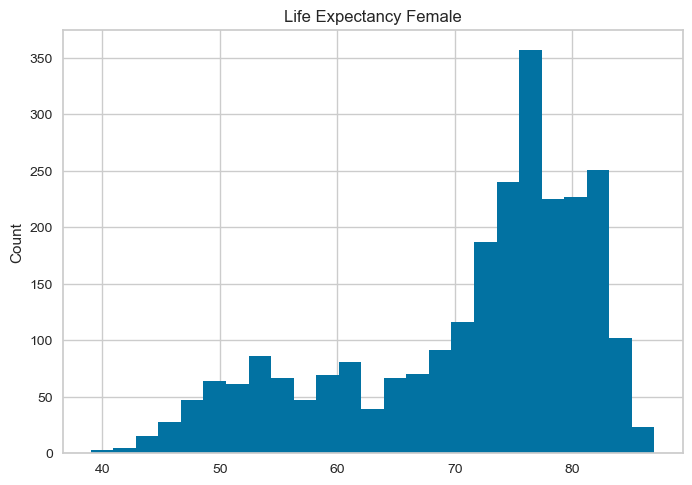

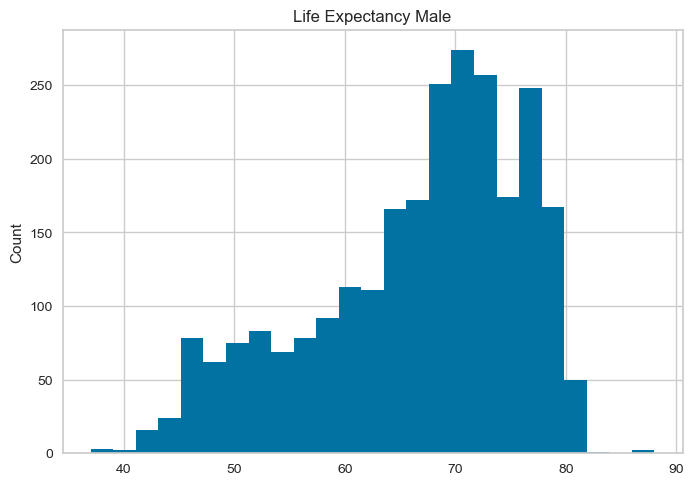

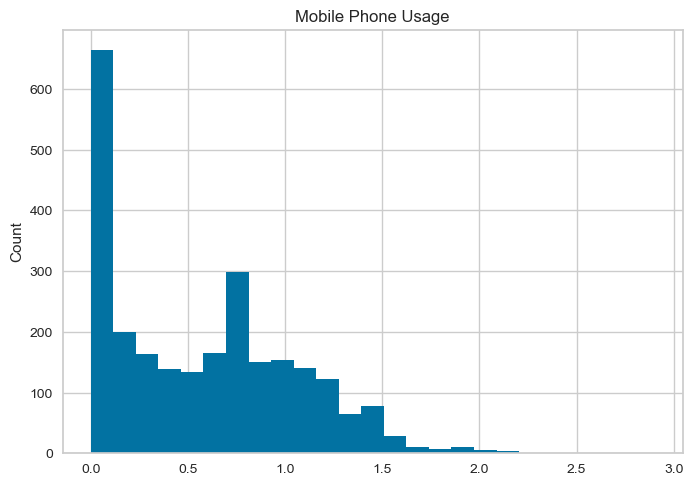

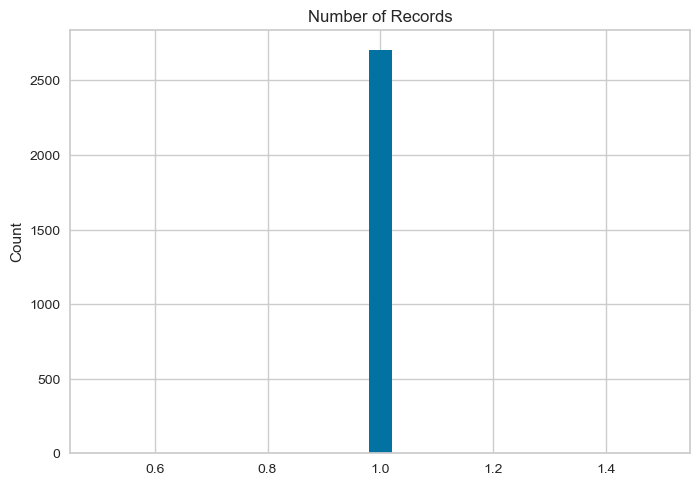

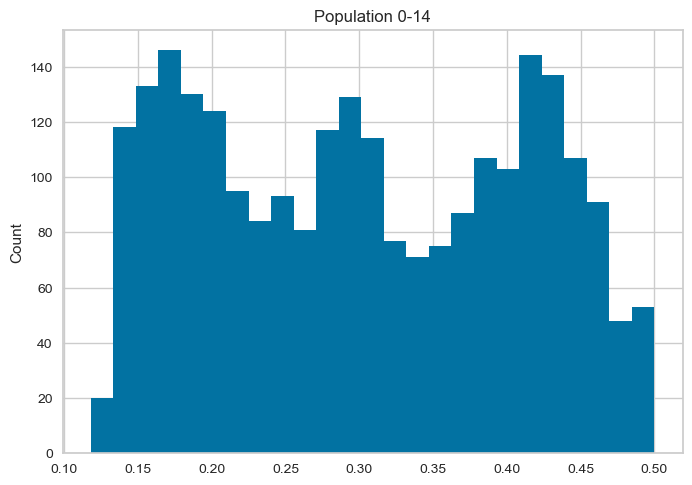

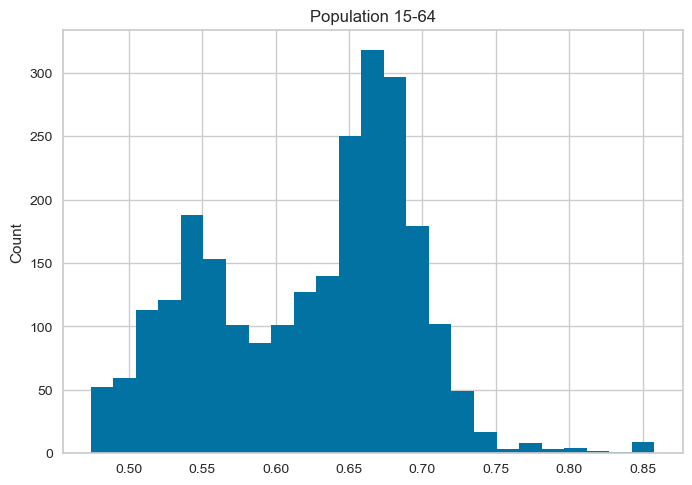

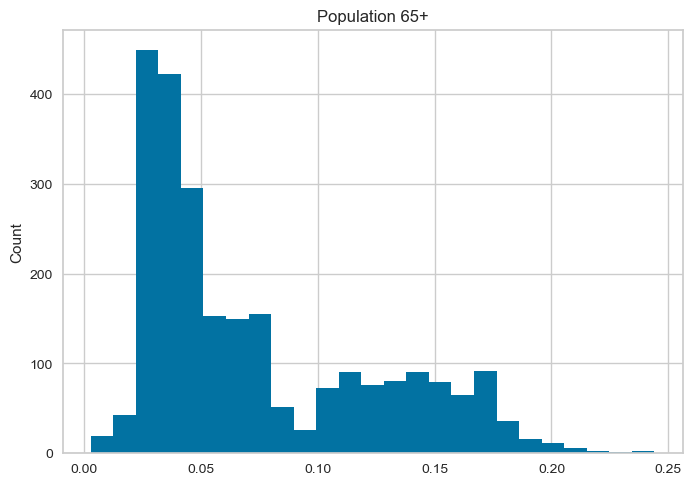

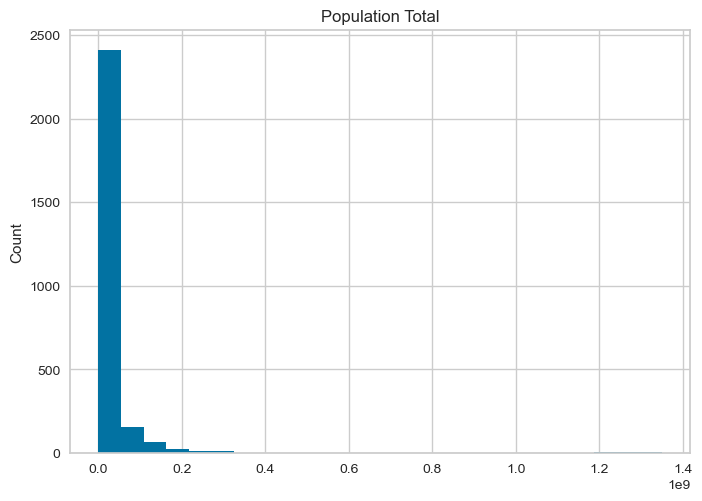

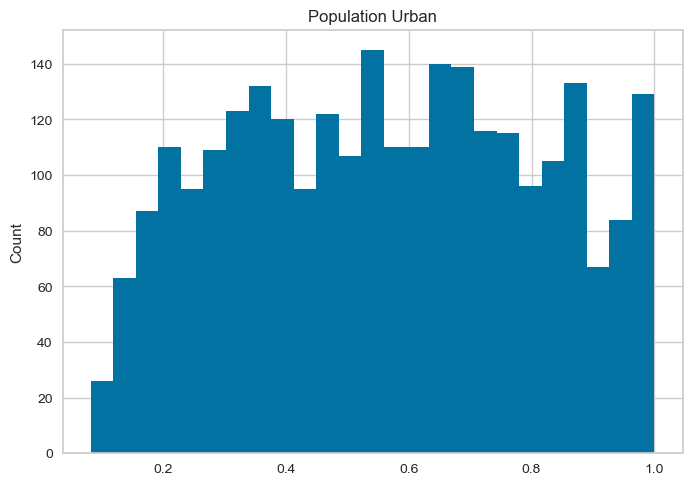

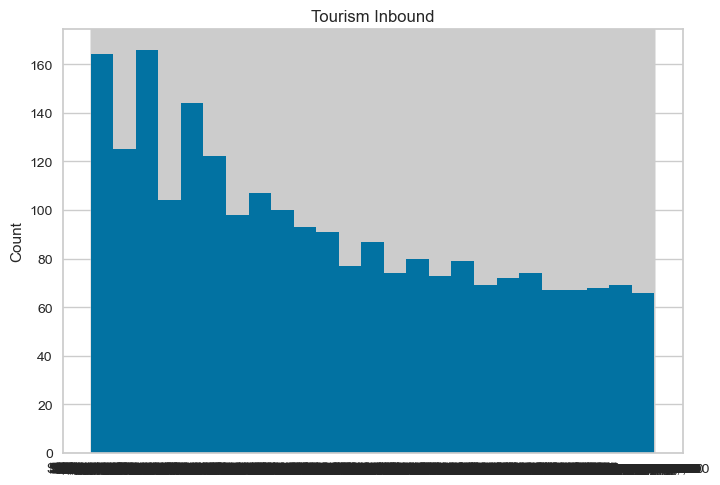

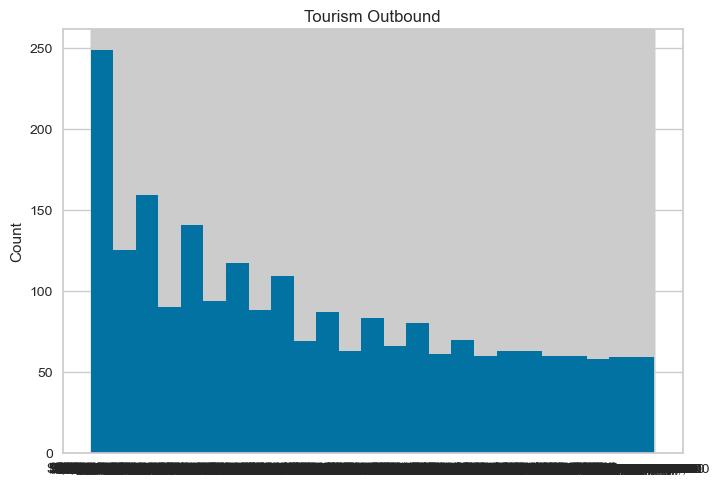

In [7]:
for feature in WD.columns:
    airline_data1 = WD.copy()
    airline_data1[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [8]:
WD.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [9]:
outlier = WD.copy()

In [10]:
# Check for numeric data
numeric_columns = [
    'Birth Rate', 'CO2 Emissions', 'Days to Start Business',
    'Population Total', 'Tourism Inbound', 'Tourism Outbound'
]

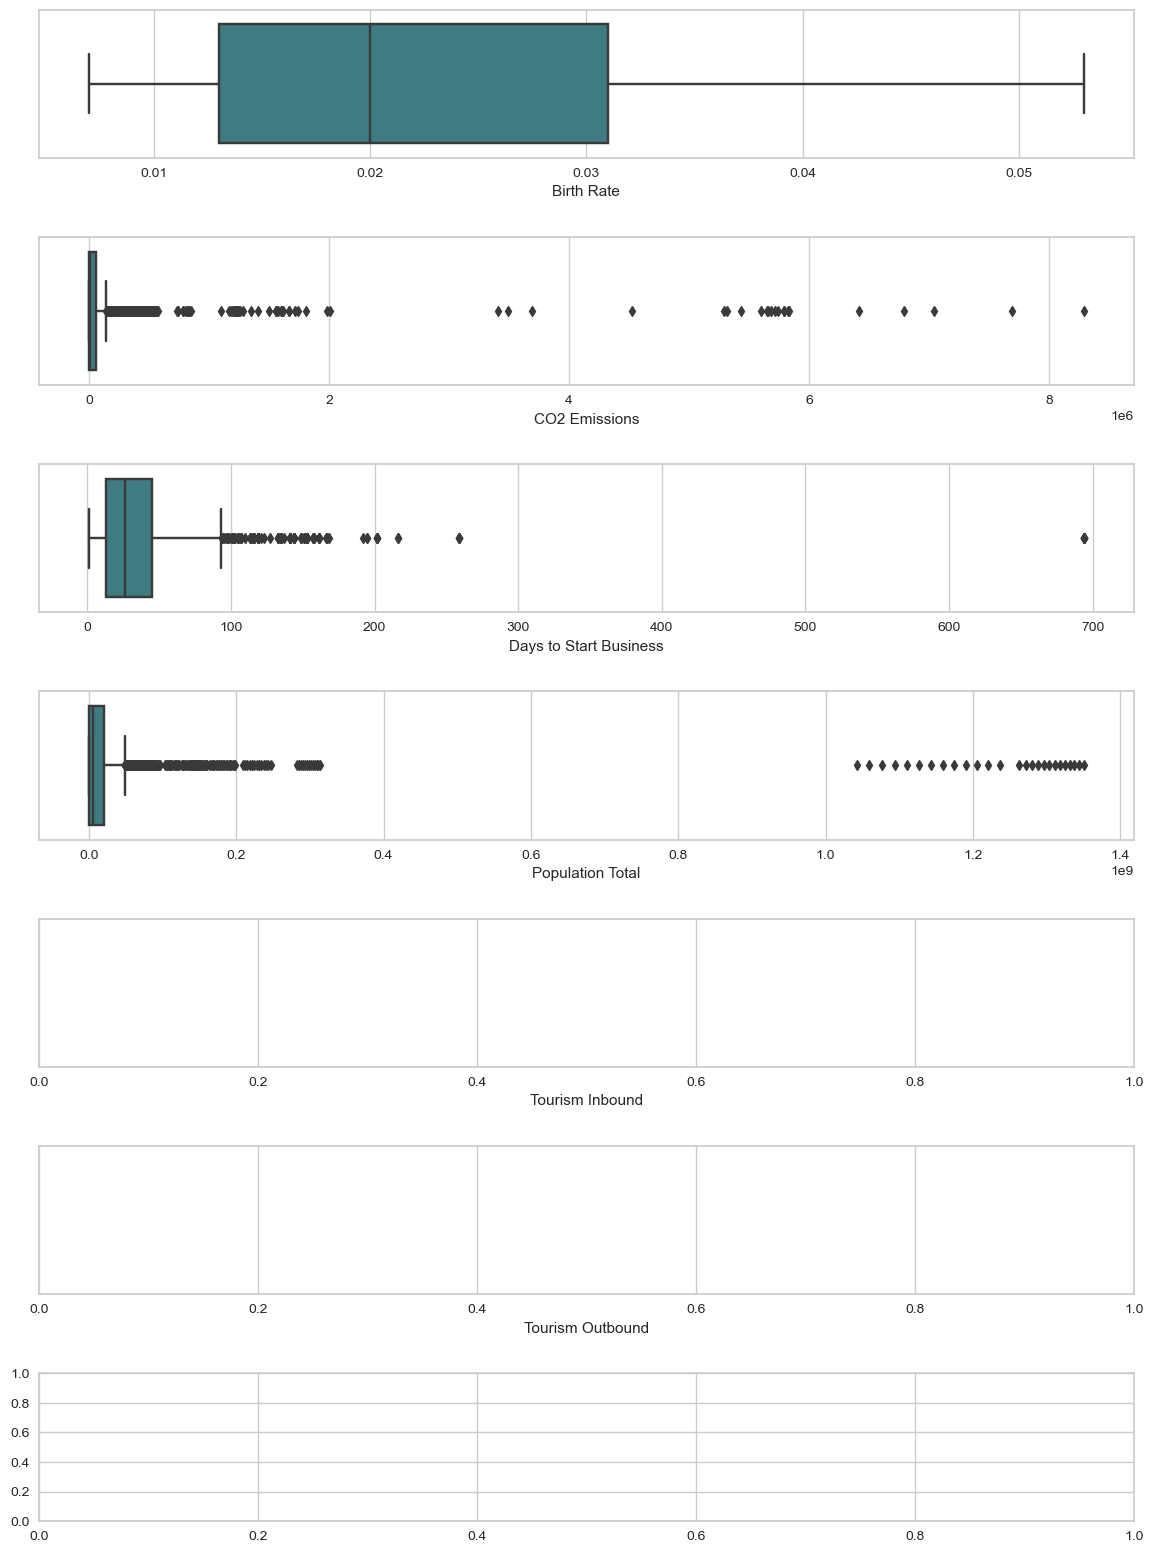

In [11]:
# Check if columns exist and are numeric
for col in numeric_columns:
    if col not in outlier.columns or not pd.api.types.is_numeric_dtype(outlier[col]):
        print(f"Warning: Column '{col}' is either missing or not numeric.")
        outlier[col] = pd.to_numeric(outlier[col], errors='coerce')  # Convert to numeric if possible

fig, axes = plt.subplots(7, 1, figsize=(12, 16), sharex=False, sharey=False)
# Numeric variables (horizontal orientation)
sns.boxplot(x='Birth Rate', data=outlier, palette='crest', ax=axes[0])
sns.boxplot(x='CO2 Emissions', data=outlier, palette='crest', ax=axes[1])
sns.boxplot(x='Days to Start Business', data=outlier, palette='crest', ax=axes[2])
sns.boxplot(x='Population Total', data=outlier, palette='crest', ax=axes[3])
sns.boxplot(x='Tourism Inbound', data=outlier, palette='crest', ax=axes[4])
sns.boxplot(x='Tourism Outbound', data=outlier, palette='crest', ax=axes[5])
plt.tight_layout(pad=2.0)
plt.show() 

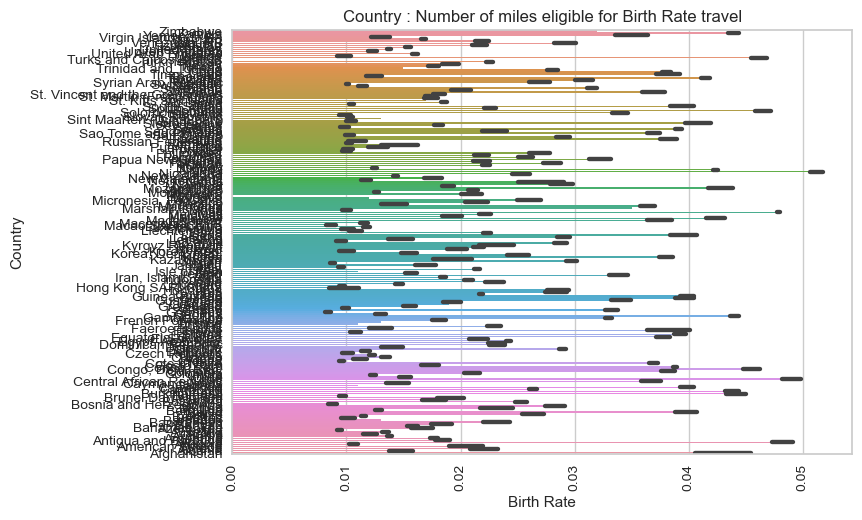

In [12]:
Balance = WD[['Birth Rate','Country']].sort_values('Country', ascending = False)
ax = sns.barplot(x='Birth Rate', y='Country', data= Balance)
ax.set(xlabel = 'Birth Rate', ylabel= 'Country')
plt.title('Country : Number of miles eligible for Birth Rate travel')
plt.xticks(rotation=90)
plt.show()

In [13]:
corr_matrix = WD.corr()
corr_matrix["Birth Rate"].sort_values(ascending=False)

Birth Rate                1.000000
Population 0-14           0.955966
Infant Mortality Rate     0.872535
Ease of Business          0.727492
Lending Interest          0.281503
Days to Start Business    0.169013
Hours to do Tax           0.069324
Population Total         -0.057851
Energy Usage             -0.169664
CO2 Emissions            -0.175750
Health Exp % GDP         -0.227653
Mobile Phone Usage       -0.558411
Population Urban         -0.606933
Internet Usage           -0.656132
Population 65+           -0.773014
Life Expectancy Male     -0.825745
Life Expectancy Female   -0.868174
Population 15-64         -0.912837
Number of Records              NaN
Name: Birth Rate, dtype: float64

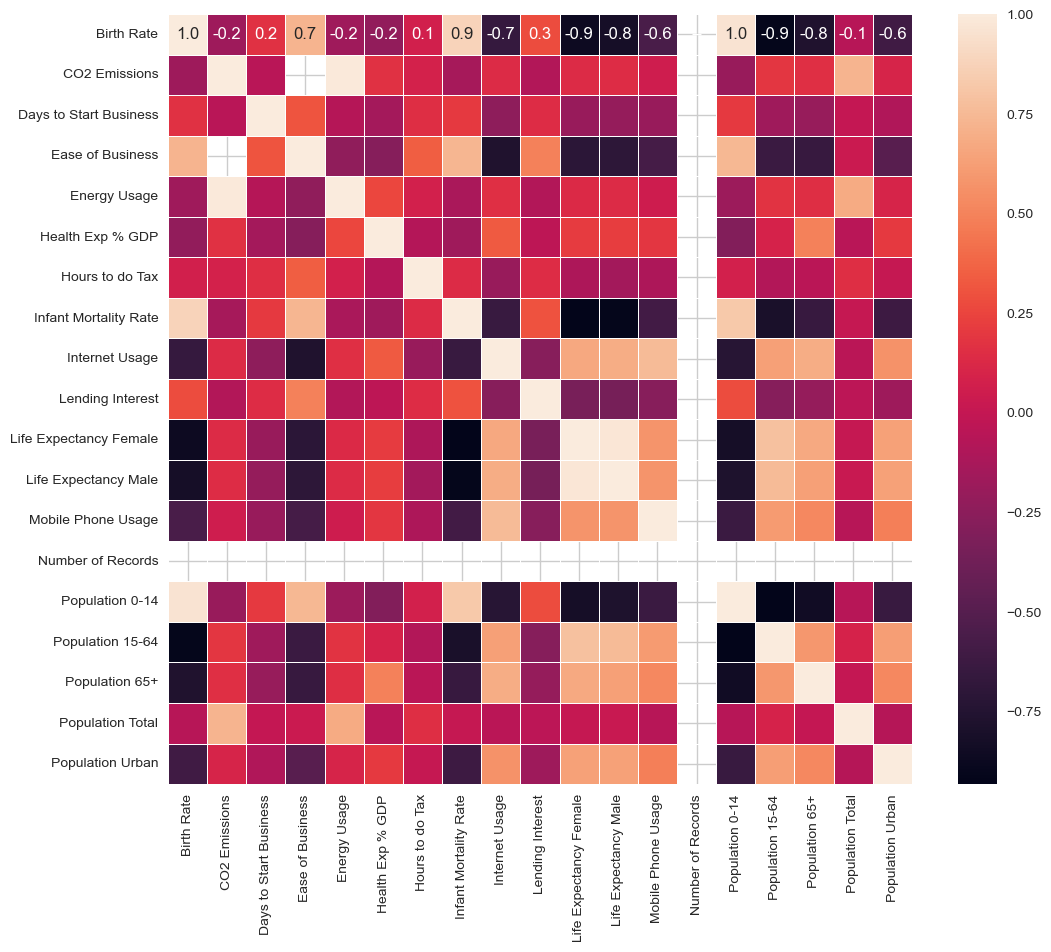

In [14]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(WD.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [15]:
# Copy the DataFrame
outlier = WD.copy()

In [16]:
# Convert percentage strings to numeric values
for col in outlier.columns:
    if outlier[col].dtype == 'object':
        # Check for percentage strings
        if outlier[col].str.contains('%', na=False).any():
            outlier[col] = outlier[col].str.replace('%', '').astype(float) / 100
        else:
            # Handle non-numeric columns (e.g., drop them or encode them)
            outlier[col] = pd.to_numeric(outlier[col], errors='coerce')


In [17]:
# Fill missing values with column mean (or other suitable method)
outlier.fillna(outlier.mean(), inplace=True)


In [18]:
# Apply StandardScaler
standard_scaler = StandardScaler()
std_airline = standard_scaler.fit_transform(outlier)

In [19]:
# Check the shape of the scaled data
print("Shape of scaled data:", std_airline.shape)

Shape of scaled data: (2704, 24)


In [20]:
# Convert percentage strings to numeric values
for col in outlier.columns:
    if outlier[col].dtype == 'object':
        # Check for percentage strings
        if outlier[col].str.contains('%', na=False).any():
            outlier[col] = outlier[col].str.replace('%', '').astype(float) / 100
        else:
            # Handle non-numeric columns (drop or encode as needed)
            outlier[col] = pd.to_numeric(outlier[col], errors='coerce')

In [21]:
# Fill missing values with the column mean
outlier.fillna(outlier.mean(), inplace=True)

In [22]:
# Apply MinMaxScaler
minmax = MinMaxScaler()
norm_airline = minmax.fit_transform(outlier)

In [23]:
# Check the shape of the normalized data
print("Shape of normalized data:", norm_airline.shape)



Shape of normalized data: (2704, 24)


In [24]:
# Check the shape of the normalized data
print("Shape of normalized data:", norm_airline.shape)

Shape of normalized data: (2704, 24)


MODELBUILDING

Clustering Algorithm
Applying clustering techniques such as K-Means.
Using the Elbow Method or Silhouette Score to determine the optimal number of clusters.

K-Means Clustering

In [25]:
# Impute missing values for numeric columns
numeric_columns = WD.select_dtypes(include=['number']).columns
imputer_num = SimpleImputer(strategy='mean')
WD[numeric_columns] = imputer_num.fit_transform(WD[numeric_columns])

In [26]:
# Normalize/Scale the numeric data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(WD[numeric_columns])

In [27]:
# Fit K-Means model with a specified number of clusters (e.g., 3 clusters)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
WD['Cluster'] = kmeans.fit_predict(scaled_data)

In [28]:
# Add cluster labels to the DataFrame
print(WD.head())

                 Birth Rate Business Tax Rate  CO2 Emissions       Country  \
GDP                                                                          
$54,790,058,957       0.020               NaN        87931.0       Algeria   
$9,129,594,819        0.050               NaN         9542.0        Angola   
$2,359,122,303        0.043               NaN         1617.0         Benin   
$5,788,311,645        0.027               NaN         4276.0      Botswana   
$2,610,959,139        0.046               NaN         1041.0  Burkina Faso   

                 Days to Start Business  Ease of Business  Energy Usage  \
GDP                                                                       
$54,790,058,957               39.999418         94.875676  26998.000000   
$9,129,594,819                39.999418         94.875676   7499.000000   
$2,359,122,303                39.999418         94.875676   1983.000000   
$5,788,311,645                39.999418         94.875676   1836.000000   
$2,

Results and Visualization

Visualizing clusters in 2D or 3D plots, or using tools like pair plots to illustrate cluster separations.

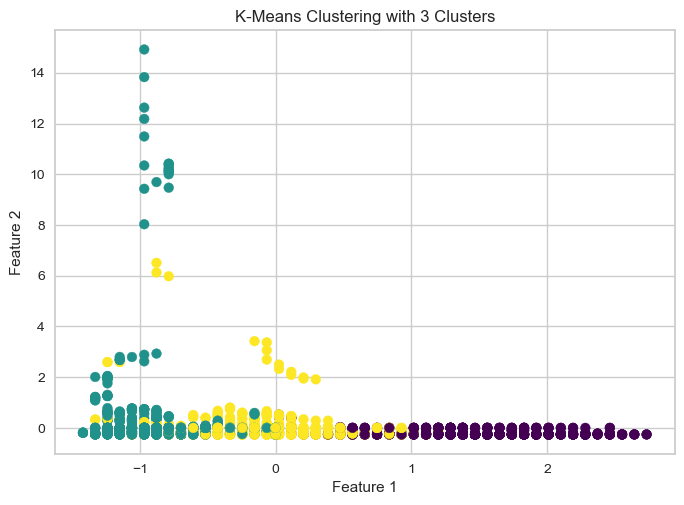

In [29]:
# Plot the clusters (if data is 2D or reduced to 2D using PCA or t-SNE)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=WD['Cluster'], cmap='viridis')
plt.title(f'K-Means Clustering with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

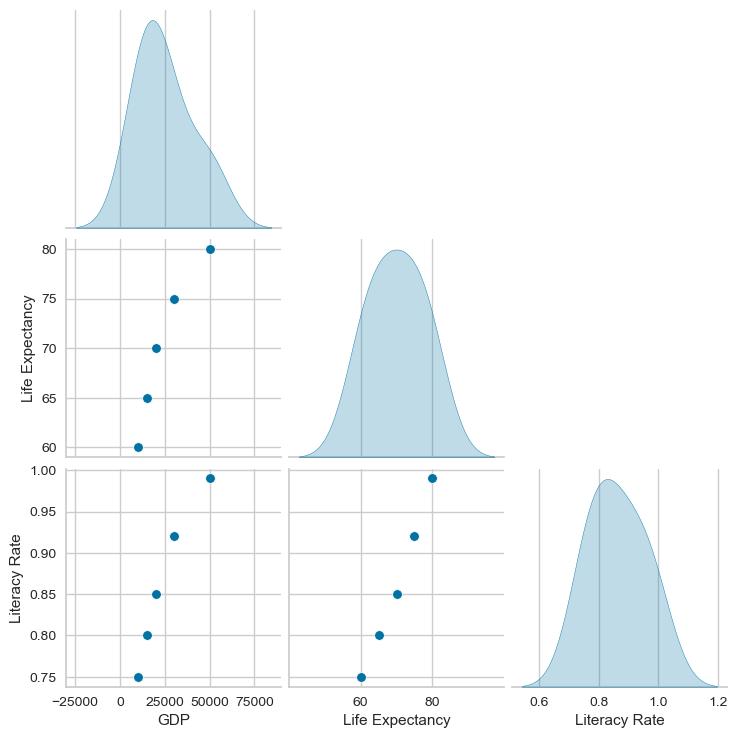

In [35]:
data = {
    'GDP': [50000, 20000, 30000, 10000, 15000],
    'Life Expectancy': [80, 70, 75, 60, 65],
    'Literacy Rate': [0.99, 0.85, 0.92, 0.75, 0.80],
    'Country': ['A', 'B', 'C', 'D', 'E']
}
df = pd.DataFrame(data)

# Create a pairplot
sns.pairplot(df, diag_kind='kde', corner=True)

# Show the plot
plt.show()

In [30]:
# Evaluate using inertia (within-cluster sum of squares)
print(f'Inertia (Within-cluster sum of squares): {kmeans.inertia_}')

Inertia (Within-cluster sum of squares): 29776.759299804435


In [31]:
# You can also try to find the optimal number of clusters using the Elbow method
from sklearn.cluster import KMeans

inertia_values = []
n_clusters_range = range(1, 11)

In [32]:
for n in n_clusters_range:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

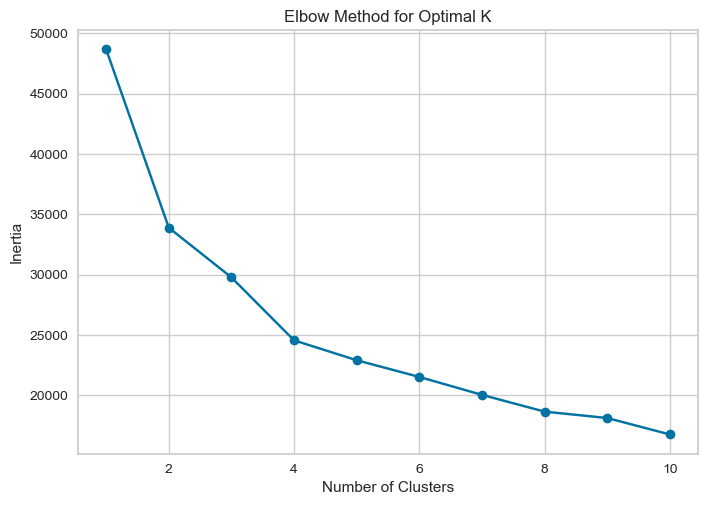

In [33]:
# Plot Elbow Method to determine optimal clusters
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [34]:
# Compute silhouette score for K-Means
kmeans_silhouette = silhouette_score(scaled_data, WD['Cluster'])
print(f'Silhouette Score for K-Means: {kmeans_silhouette}')

Silhouette Score for K-Means: 0.23759415386915955


Insights and Conclusions

Discussion of the clusters and their relevance to global development. For example, grouping countries based on similar socio-economic indicators.
e:

1. **Introduction**: The project aims to analyze global development metrics using clustering techniques.

2. **Libraries and Tools**: Essential libraries like Pandas, NumPy, Matplotlib, and clustering tools like KMeans and hierarchical methods are used.

3. **Dataset**: The analysis uses a dataset related to global development indicators (e.g., GDP, life expectancy, literacy rates).

4. **Preprocessing**: Steps likely include handling missing values, scaling data, and preparing it for clustering.

5. **Clustering**: Techniques like KMeans and Hierarchical clustering are employed, possibly combined with methods like the Elbow method for optimal cluster selection.

6. **Visualization**: Data and clustering results are visualized using plots for better inter7.**Results and Insights**: Clusters highlight patterns or groups of countries/regions based on development indicators.c part, let me know!